In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [3]:
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [9]:
df['returns'] = df.market_value.pct_change(1) * 100

In [10]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Mon, 22 Nov 2021   AIC                          55214.010
Time:                        21:26:47   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.653      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.924      0.000      -0.896      -0.688
sigma2      3498.7784     40.933     85.476      0.000    3418.551    3579.005
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.22
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

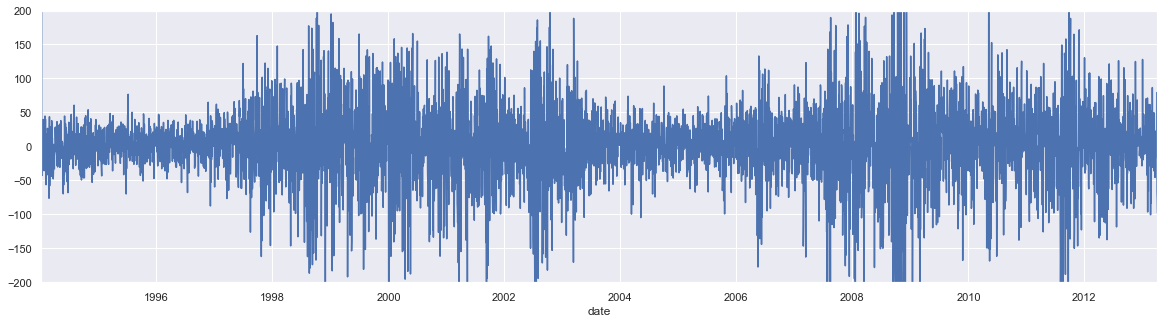

In [13]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
df.res_ar_1_i_1_ma_1.plot(figsize=(20,5))
plt.ylim(-200,200)
plt.show()

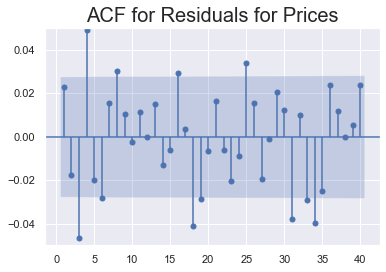

In [17]:
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices",size =20)
plt.ylim(-0.05,0.05)
plt.show()

The 3rd and 4th lags seem highly significant, which suggests that these should be included in the model. 6th and 8th are also border-line significant.This means that we should look at all possible models from ARIMA(1,1,1) to ARIMA(4,1,4). That is 15 models in addition to ARIMA(1,1,1). Instructors has shortlisted the models that performed well, ie. the models which had all coefficients significant at the 5% level. This yields 5 models -

ARIMA(1,1,2),ARIMA(1,1,3),ARIMA(2,1,1),ARIMA(3,1,1),ARIMA(3,1,2)

### Higher Lag ARIMA Models

In [19]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value,order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value,order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value,order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value,order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value,order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [20]:
print("\n ARIMA(1,1,1) : \tLL = ",results_ar_1_i_1_ma_1.llf,"\tAIC = ",results_ar_1_i_1_ma_1.aic)
print("\n ARIMA(1,1,2) : \tLL = ",results_ar_1_i_1_ma_2.llf,"\tAIC = ",results_ar_1_i_1_ma_2.aic)
print("\n ARIMA(1,1,3) : \tLL = ",results_ar_1_i_1_ma_3.llf,"\tAIC = ",results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(2,1,1) : \tLL = ",results_ar_2_i_1_ma_1.llf,"\tAIC = ",results_ar_2_i_1_ma_1.aic)
print("\n ARIMA(3,1,1) : \tLL = ",results_ar_3_i_1_ma_1.llf,"\tAIC = ",results_ar_3_i_1_ma_1.aic)
print("\n ARIMA(3,1,2) : \tLL = ",results_ar_3_i_1_ma_2.llf,"\tAIC = ",results_ar_3_i_1_ma_2.aic)


 ARIMA(1,1,1) : 	LL =  -27604.005116787335 	AIC =  55214.01023357467

 ARIMA(1,1,2) : 	LL =  -27600.407632541024 	AIC =  55208.81526508205

 ARIMA(1,1,3) : 	LL =  -27590.723481949706 	AIC =  55191.44696389941

 ARIMA(2,1,1) : 	LL =  -27600.13055105335 	AIC =  55208.2611021067

 ARIMA(3,1,1) : 	LL =  -27592.336116474202 	AIC =  55194.672232948404

 ARIMA(3,1,2) : 	LL =  -27590.92031805083 	AIC =  55193.84063610166
